# Stack Overflow Data - 2017 Survey


## Imports necessary for first analisys
### gather

In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
%config IPCompleter.greedy=True

# First look at Data
### assess

In [3]:
df = pd.read_csv('survey_results_public.csv')

In [4]:
df.shape

(51392, 154)

In [5]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

# Analysis

In [5]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


### we have 154 coluns and only 7 numerical. wow is necessary choose the correct data

In [6]:
df.isnull().mean() * 100

Respondent                           0.000000
Professional                         0.000000
ProgramHobby                         0.000000
Country                              0.000000
University                           0.000000
EmploymentStatus                     0.000000
FormalEducation                      0.000000
MajorUndergrad                      16.638776
HomeRemote                          14.367995
CompanySize                         24.264477
CompanyType                         24.457114
YearsProgram                         0.480620
YearsCodedJob                       20.435087
YearsCodedJobPast                   98.104763
DeveloperType                       29.706958
WebDeveloperType                    79.187422
MobileDeveloperType                 96.978129
NonDeveloperType                    90.484900
CareerSatisfaction                  16.922867
JobSatisfaction                     21.435243
ExCoderReturn                       98.204001
ExCoderNotForMe                   

### Many nan values in this dataset !!!
### We need choose columns with many caution for use in any analysis, because have many null data.

## First analysis

### Next language based in WantWorkLanguage

Discovery based in what the next language the developers want to learning

In [55]:
def top_5_next_language(df_colum):
    """This function split the colum and count values"""
    temp_list = []
    next_languge = df_colum.dropna()
    for row in next_languge.to_list():
        temp_value = row.split(";")
        temp_value = [x.strip(' ') for x in temp_value]
        temp_list = temp_list + temp_value
    
    df_temp = pd.DataFrame(temp_list, columns=['language'])
    print(df_temp.language.value_counts().head())
    return df_temp
    


top_5_next_language(df.WantWorkLanguage);

JavaScript    16327
Python        12570
SQL           11217
C#            10187
Java           9988
Name: language, dtype: int64


### wow python and javascript is so high, but python is losing the battle

# Next language by Professional

# Let's see the language by Professional

In [28]:
df.Professional.value_counts().index

Index(['Professional developer', 'Student',
       'Professional non-developer who sometimes writes code',
       'Used to be a professional developer', 'None of these'],
      dtype='object')

In [29]:
professional_list = list(df.Professional.value_counts().index)

In [45]:
for professional in professional_list:
    filter_professional = df.Professional==professional
    print(professional)
    top_5_next_language(df[filter_professional].WantWorkLanguage)
    print("")

Professional developer
JavaScript    12755
SQL            8531
Python         8386
C#             7957
Java           7102
Name: language, dtype: int64

Student
Python        2083
JavaScript    1919
Java          1851
C++           1764
SQL           1295
Name: language, dtype: int64

Professional non-developer who sometimes writes code
Python        1645
JavaScript    1256
SQL           1092
Java           754
C++            707
Name: language, dtype: int64

Used to be a professional developer
Python        209
JavaScript    205
SQL           181
Java          129
C#            106
Name: language, dtype: int64

None of these
Python        247
C++           207
JavaScript    192
C             160
Java          152
Name: language, dtype: int64



## the biggest difference is only for Professional developer

## The time of work made any influence in next language?

In [58]:
time_program_list = list(df.YearsProgram.value_counts().index)
time_program_list.sort()
list_df = []
for time_program in time_program_list:
    filter_time_program = df.YearsProgram==time_program
    print(time_program)
    df_temp = top_5_next_language(df[filter_time_program].WantWorkLanguage)
    list_df.append(df_temp)
    print("")

1 to 2 years
JavaScript    617
Python        535
Java          473
SQL           434
C++           355
Name: language, dtype: int64

10 to 11 years
JavaScript    800
Python        560
SQL           482
C#            471
Java          438
Name: language, dtype: int64

11 to 12 years
JavaScript    513
Python        379
SQL           315
C#            306
Java          302
Name: language, dtype: int64

12 to 13 years
JavaScript    471
Python        347
C#            296
SQL           296
Java          253
Name: language, dtype: int64

13 to 14 years
JavaScript    373
Python        290
SQL           268
C#            263
Java          214
Name: language, dtype: int64

14 to 15 years
JavaScript    697
SQL           491
Python        456
C#            426
Java          371
Name: language, dtype: int64

15 to 16 years
JavaScript    597
Python        392
SQL           389
C#            375
Java          302
Name: language, dtype: int64

16 to 17 years
JavaScript    360
Python        250
SQL   

In [114]:
# list_df_dataframe = [pd.DataFrame(df_lambda.value_counts().reset_index()) for df_lambda in list_df]

list_df_dataframe = []

for value in zip(list_df, time_program_list):
    df_temp = pd.DataFrame(value[0].value_counts().reset_index()) 
    df_temp['time'] = value[1]
    list_df_dataframe.append(df_temp)

df_all = pd.concat(list_df_dataframe)
df_all = df_all.rename({0: '0'}, axis='index')
df_all.shape

(734, 3)

In [116]:
list(df_all.time.unique())

['1 to 2 years',
 '10 to 11 years',
 '11 to 12 years',
 '12 to 13 years',
 '13 to 14 years',
 '14 to 15 years',
 '15 to 16 years',
 '16 to 17 years',
 '17 to 18 years',
 '18 to 19 years',
 '19 to 20 years',
 '2 to 3 years',
 '20 or more years',
 '3 to 4 years',
 '4 to 5 years',
 '5 to 6 years',
 '6 to 7 years',
 '7 to 8 years',
 '8 to 9 years',
 '9 to 10 years',
 'Less than a year']

In [117]:
d_time_index = {'1 to 2 years':1,
 '10 to 11 years':10,
 '11 to 12 years':11,
 '12 to 13 years':12,
 '13 to 14 years':13,
 '14 to 15 years':14,
 '15 to 16 years':15,
 '16 to 17 years':16,
 '17 to 18 years':17,
 '18 to 19 years':18,
 '19 to 20 years':19,
 '2 to 3 years':2,
 '20 or more years':20,
 '3 to 4 years':3,
 '4 to 5 years':4,
 '5 to 6 years':5,
 '6 to 7 years':6,
 '7 to 8 years':7,
 '8 to 9 years':8,
 '9 to 10 years':9,
 'Less than a year':0}
df_all['time_index'] = df_all.time.map(d_time_index)

In [125]:
df_all = df_all.sort_values('time_index')

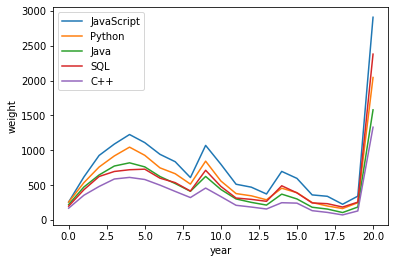

In [126]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

for name in ['JavaScript','Python','Java','SQL','C++']:
    ax.plot(df_all[df_all.language==name]['time_index'],df_all[df_all.language==name][0],label=name)

ax.set_xlabel("year")
ax.set_ylabel("weight")
ax.legend(loc='best')

## Have time with more interesting in other language. But not so evident

The language not change with time of experience

# What is language or languages with more satisfaction?

In [22]:
df2 = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']].copy()
df2 = df2.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage', 'Professional'])
df2.head()

,Professional,HaveWorkedLanguage,JobSatisfaction
2,Professional developer,Java; PHP; Python,9.0
3,Professional non-developer who sometimes write...,Matlab; Python; R; SQL,3.0
6,Professional non-developer who sometimes write...,Matlab; Python,6.0
7,Professional developer,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,Professional developer,C#; JavaScript,6.0


In [27]:
df2.Professional.value_counts()

Professional developer                                  26728
Professional non-developer who sometimes writes code     3205
Used to be a professional developer                       407
Student                                                     2
Name: Professional, dtype: int64

In [46]:
gp = df2.groupby("Professional")
dict_professional = {}
for name, group in gp:
    print(name)
    dict_professional[name]={}
    for index, row in group.iterrows():
        temp_value = row['HaveWorkedLanguage'].split(";")
        list_temp = [x.strip(' ') for x in temp_value]
        for value in list_temp:
            if value in dict_professional[name].keys():
                mean = dict_professional[name][value]
                mean = (mean + row['JobSatisfaction']) / 2
            else:
                dict_professional[name][value] = row['JobSatisfaction']

Professional developer
Professional non-developer who sometimes writes code
Student
Used to be a professional developer


In [48]:
dict_professional.keys()

dict_keys(['Professional developer', 'Professional non-developer who sometimes writes code', 'Student', 'Used to be a professional developer'])

In [53]:
for dict_key in dict_professional.keys():
    A = dict_professional[dict_key]
    print(dict_key)
    print(sorted(A, key=A.get, reverse=False)[:5])


Professional developer
['R', 'VBA', 'C#', 'SQL', 'Groovy']
Professional non-developer who sometimes writes code
['VBA', 'Assembly', 'Common Lisp', 'Matlab', 'Python']
Student
['Assembly', 'C', 'C++', 'Java', 'JavaScript']
Used to be a professional developer
['VB.NET', 'Visual Basic 6', 'Go', 'CoffeeScript', 'Clojure']


In [51]:
dict_professional

{'Professional developer': {'Java': 9.0,
  'PHP': 9.0,
  'Python': 9.0,
  'CoffeeScript': 7.0,
  'Clojure': 7.0,
  'Elixir': 7.0,
  'Erlang': 7.0,
  'Haskell': 7.0,
  'JavaScript': 7.0,
  'Ruby': 7.0,
  'C#': 6.0,
  'Objective-C': 8.0,
  'Swift': 8.0,
  'SQL': 6.0,
  'Assembly': 8.0,
  'C': 8.0,
  'C++': 8.0,
  'VB.NET': 8.0,
  'Matlab': 8.0,
  'Rust': 8.0,
  'Perl': 8.0,
  'Scala': 7.0,
  'R': 4.0,
  'F#': 9.0,
  'TypeScript': 8.0,
  'VBA': 5.0,
  'Lua': 8.0,
  'Groovy': 6.0,
  'Go': 6.0,
  'Smalltalk': 7.0,
  'Visual Basic 6': 6.0,
  'Common Lisp': 10.0,
  'Dart': 7.0,
  'Julia': 10.0,
  'Hack': 7.0},
 'Professional non-developer who sometimes writes code': {'Matlab': 3.0,
  'Python': 3.0,
  'R': 3.0,
  'SQL': 3.0,
  'JavaScript': 7.0,
  'C': 9.0,
  'C++': 9.0,
  'Lua': 9.0,
  'Java': 4.0,
  'PHP': 4.0,
  'VB.NET': 4.0,
  'C#': 8.0,
  'VBA': 0.0,
  'Ruby': 5.0,
  'CoffeeScript': 8.0,
  'Haskell': 8.0,
  'Rust': 8.0,
  'TypeScript': 8.0,
  'Visual Basic 6': 5.0,
  'Objective-C': 9.0,


## It was not possible to see any relationship with the language to be learned and satisfaction. This is also a good thing, not every analysis is based on a conclusion, you can learn a lot from the inconclusion or that it does not serve much.

# How to clean categorical data more easily

# And how to clean Categorical data with dummy

In [62]:
df_d = df[['Professional']].copy()
df_d = df_d.dropna(subset=['Professional'])
df_d.head()

,Professional
0,Student
1,Student
2,Professional developer
3,Professional non-developer who sometimes write...
4,Professional developer


In [68]:
pd.get_dummies(df_d, columns=['Professional']).head()

,Professional_None of these,Professional_Professional developer,Professional_Professional non-developer who sometimes writes code,Professional_Student,Professional_Used to be a professional developer
0,0,0,0,1,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [74]:
pd.get_dummies(df_d, columns=['Professional'], dummy_na=True).head()

,Professional_None of these,Professional_Professional developer,Professional_Professional non-developer who sometimes writes code,Professional_Student,Professional_Used to be a professional developer,Professional_nan
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


### For categorical data it's so easy to change.

# Prepare the data

In [15]:
df.shape

(51392, 154)

In [22]:
df_model = df.copy().dropna(subset=['StackOverflowSatisfaction'],axis=0)

In [23]:
df_model.shape

(36592, 154)

In [24]:
df_model.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

# Model

In [6]:
# Import models for regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# #Drop the rows with missing salaries
# drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0)

# # Mean function
# fill_mean = lambda col: col.fillna(col.mean())
# # Fill the mean
# fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = fill_df[['CareerSatisfaction', 'HoursPerWeek', 'JobSatisfaction', 'StackOverflowSatisfaction']]
y = fill_df['StackOverflowSatisfaction']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)

r2_score_value = r2_score(y_test, y_test_preds)
f"The r-squared score for the model using only quantitative variables was {r2_score_value} on {len(y_test)} values."